# Homework 1: Basic Python, Arrays, and DataFrames

## Due Saturday, October 14th at 11:59PM

Welcome to Homework 1! This week's homework will cover basic Python, arrays, and DataFrames. You can find additional help on these topics in [Chapter 1](https://www.inferentialthinking.com/chapters/01/what-is-data-science.html) of Computational and Inferential Thinking and [BPD 1-11](https://notes.dsc10.com/01-getting_started/tools.html) in the `babypandas` notes.


### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (the schedule can be found [here](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

In [1]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import matplotlib.pyplot as plt
import numpy as np
import otter
grader = otter.Notebook()

plt.style.use('ggplot')

## 1. Characters in Peter Pan 👦🏼👱🏻‍♀️🧚👴🏻

In Lecture 1, we counted the number of times that the characters Amy, Beth, Jo, Meg, and Laurie were named in each chapter of the classic book _Little Women_. In this question, we'll look at another classic book – _Peter Pan (1911)_ by J. M. Barrie. In 1991, the copyright protections of the original book (but not the movies!) expired, and so sites like Project Gutenberg are able to post copies of the book without violating any copyright laws. Click [here](https://www.gutenberg.org/files/16/16-h/16-h.htm) to read an eBook of the original novel.

<center><img src=images/peter-pan-illustration.png width=350>(<a href="https://en.wikipedia.org/wiki/Peter_and_Wendy">source</a>)</center>

Four of the main characters in _Peter Pan_ are Peter Pan (👦🏼), Wendy Darling (👱🏻‍♀️), Tinker Bell (🧚), and Mr. Smee 
(👴🏻).

Below, we've written code that shows the number of mentions of each of these four characters in the first 12 chapters of the book. However, instead of displaying this information in a line chart, as was done in Lecture 1, we will use a bar chart.

Run the cell below to generate this bar chart of the first 12 chapters. This cell contains code that hasn't yet been covered in the course. It isn't expected that you'll understand the code, but you should be able to interpret the bar chart it generates. The questions below can all be answered from the bar chart alone! It may help to open another copy of the notebook in a new tab so you can easily refer to the bar chart throughout this question.

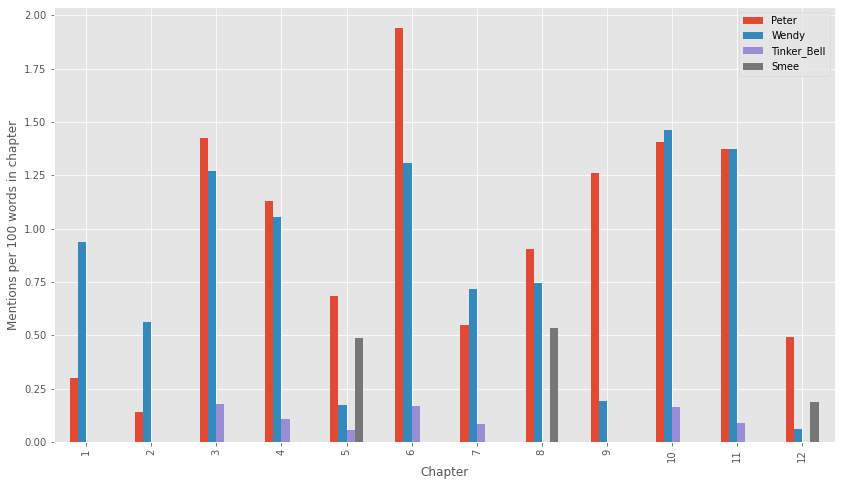

In [2]:
# Open the book and split it into chapters.
book_file = 'data/peter-and-wendy.txt'
raw_book = open(book_file, encoding="utf-8").read()
end_pos = raw_book.index('Chapter XIII')
chapters = raw_book[:end_pos].split('Chapter ')[1:]

# Find the number of words in each chapter.
chapter_lengths = (np.array([len(c.split(' ')) for c in chapters]) / 100)
# Find the number of mentions per 100 words for each character and chapter.
characters = bpd.DataFrame().assign(
    Chapter=np.arange(1, 13),
    Peter=np.char.count(chapters, 'Peter') / chapter_lengths,
    Wendy=np.char.count(chapters, 'Wendy') / chapter_lengths,
    Tinker_Bell=np.char.count(chapters, 'Tinker Bell') / chapter_lengths,
    Smee=np.char.count(chapters, 'Smee') / chapter_lengths
)

characters.plot(kind='bar', x='Chapter', figsize=(14, 8))
plt.ylabel('Mentions per 100 words in chapter');

In [3]:
# Creating a DataFrame of number of mentions per Chapter

# Creating arrays of the percent of mentions per chapter and multiply \
# by the number of 
p = np.array(characters.get('Peter')) * chapter_lengths
w = np.array(characters.get('Wendy')) * chapter_lengths
tb = np.array(characters.get('Tinker_Bell')) * chapter_lengths
s = np.array(characters.get('Smee')) * chapter_lengths

mentions_per_chapter = bpd.DataFrame().assign(
    Chapter = np.arange(1, 13),
    Peter = p,
    Wendy = w,
    Tinker_Bell = tb,
    Smee = s
)

mentions_per_chapter

,Chapter,Peter,Wendy,Tinker_Bell,Smee
0,1,9.0,28.0,0.0,0.0
1,2,4.0,16.0,0.0,0.0
2,3,56.0,50.0,7.0,0.0
3,4,31.0,29.0,3.0,0.0
4,5,24.0,6.0,2.0,17.0
...,...,...,...,...,...
7,8,34.0,28.0,0.0,20.0
8,9,13.0,2.0,0.0,0.0
9,10,26.0,27.0,3.0,0.0
10,11,30.0,30.0,2.0,0.0


Looking at the bar chart, we see that the height of the bar for Peter in Chapter 1 is 0.27 and the y-axis of this graph is “Mentions per 100 words in chapter”;  this means that 0.27 of every 100 words in Chapter 1 are `"Peter"`. In other words, $0.27\%$ of the words in Chapter 1 are `"Peter"`.

**Question 1.1.**  The following sentences are the very first time Peter Pan, Tinker Bell, and Mr. Smee are mentioned in the book, respectively:

> There never was a simpler happier family until the coming of Peter Pan.

>  It was a girl called Tinker Bell exquisitely gowned in a skeleton leaf.

> The boat drew nearer. It was the pirate dinghy, with three figures in her, Smee and Starkey, and the third a captive, no other than Tiger Lily. 

Which chapters are each of these sentences from? Assign the variables `peter_debut`, `tinker_bell_debut`, `smee_debut` to an integer between 1 and 12.

In [4]:
peter_debut = 1
tinker_bell_debut = 3
smee_debut = 5

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Wendy is mentioned 28 times in Chapter 8. How many times is Peter mentioned in Chapter 8? Assign the variable `peter_mentioned` to 1, 2, 3, 4, or 5 corresponding to the answer choices below. Remember to input your answer as either **1, 2, 3, 4, or 5, corresponding to the option numbers below, and not to the number of times Peter is mentioned.** For example, if you think Peter is mentioned 44 times, you should set `peter_mentioned` to 5, not 44.

1. 28 times
1. 30 times
1. 34 times
1. 40 times
1. 44 times

In [6]:
peter_mentioned = 3

In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Chapter 3 is quite long, as its the chapter when Peter tells Wendy that he ran away from his parents. For reference, Chapter 6 is 2369 words long while Chapter 3 is 3931 words long. Based on this information and the plot, which of the following is correct? Assign the variable `pp_part3` to 1, 2, 3, or 4.

1. Peter is mentioned more times in Chapter 3 than in Chapter 6. Tinker Bell is mentioned more times in Chapter 3 than in Chapter 6.
1. Peter is mentioned more times in Chapter 3 than in Chapter 6. Tinker Bell is mentioned fewer times in Chapter 3 than in Chapter 6.
1. Peter is mentioned fewer times in Chapter 3 than in Chapter 6. Tinker Bell is mentioned more times in Chapter 3 than in Chapter 6.
1. Peter is mentioned fewer times in Chapter 3 than in Chapter 6. Tinker Bell is mentioned fewer times in Chapter 3 than in Chapter 6.

In [8]:
# mentions_per_chapter.get('Peter').iloc[5] 46 56
# mentions_per_chapter.get('Tinker_Bell').iloc[5] 4 7

pp_part3 = 1


In [9]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Which of the following is a valid conclusion we can make based off of the above plot alone? Assign `pp_part4` to 1, 2, 3, 4, or 5. There is only one correct answer.

1. Wendy is mentioned more times in Chapter 10 than she is in Chapter 11.

1. Mr. Smee is mentioned more in Chapter 8 than any other chapter.

1. Tinker Bell is mentioned roughly the same number of times in Chapters 6 and 10.

1. Tinker Bell is mentioned less in Chapter 5 than any other chapter.

1. Peter and Wendy are mentioned roughly the same number of times in Chapter 11.

In [10]:
pp_part4 = 2


In [11]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**_Note:_**  The tests in this section only check that you set each variable to a number in the correct range. Unlike in labs, tests in homeworks **do not** check that you answered correctly; they only check that your answer is *reasonable*, or in the correct format. To put it another way: all of your tests might pass, but that doesn't mean you'll get full credit – some of your answers may still be wrong. It's up to you to make sure that they're right!

## 2. Python Basics 🐍

**Question 2.1.** When you run the following cell, Python produces a cryptic error message.

In [12]:
# 2023 = 2025 - 2.0

Choose the best explanation of what's wrong with the code, and then assign 1, 2, 3, or 4 to `basics_part1` below to indicate your answer.

1. The left hand side is an `int`, while the right hand side is a `float`. The left side should be `2023.0` isntead.

1. The result should be written after the calculation. It should be `2025 - 2.0 = 2023`.

1. Python is not able to subtract a `float` from an `int` because they are of different data types.

1. This is trying to create a variable named `2023`, which doesn't make sense because `2023` is a number.


<font color=red>**🚨 Important: Once you have finished this question, "comment"  out the above code cell out by replacing it with `# 2023 = 2025 - 2.0`. This will prevent the error message from appearing when your notebook is graded.**</font>

In [13]:
basics_part1 = 1

In [14]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** Consider the following poorly-written code.

In [15]:
two = 2
three = 3
two = two + three
two = two * three
two = two * two
two = -two

As this code executes, what values does the variable `two` take on? Assign 1, 2, 3, or 4 to `basics_part2` to indicate your answer.

1. The variable `two` takes on the values 2, 5, 6, 4, -4.

2. The variable `two` takes on the values 2, 5, 15, 225, -225.

3. The variable `two` takes on the values 2, 5, 6, 12, -12.

4. The variable `two` takes on the values 2, 5, 12, 144, -144.

In [16]:
basics_part2 = 2

In [17]:
grader.check("q2_2")

q2_2 results: All test cases passed!

## 3. Road Trip   🚘 

This summer, you went on a road trip with your friend Bill. Now, you want to perform some calculations on data you gathered throughout your journey. Answer the questions below, using Python to perform all the intermediate calculations, such as adding, squaring, and dividing.

Note that the `math` package has not been imported. You don't need it for this question, and **you should not import it**, otherwise the autograder may produce an error.

**Question 3.1.** On the first day of the trip, Bill drove the car at three different speeds, for varying lengths of time, as shown below:

| Journey | Speed (miles per hour) | Time (hours)|
| --- | --- | --- |
| Part 1 | 56 | 3 |
| Part 2 | 44 | 4 |
| Part 3 | 80 | 2 |

Bill was lucky to avoid a ticket in the last part of the journey!

Using this information, calculate the average speed, in miles per hour, at which Bill drove the car that day, and assign your answer to the variable `means_part1`. Recall from math and physics that the average speed is the total distance driven divided by the total time taken.

In [18]:
# Feel free to define intermediate variables to use in your solution.

total_distance = sum([56 * 3, 44 * 4, 80 * 2])
total_time = sum([3, 4, 2])
means_part1 = total_distance / total_time
means_part1

56.0

In [19]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** On the second day of the trip, Bill drove the car three times again, but this time at the speeds and distances seen below:

| Journey | Speed (miles per hour) | Distance (miles)|
| --- | --- | --- |
| Part 1 | 56 | 3 |
| Part 2 | 44 | 4 |
| Part 3 | 80 | 2 |

Using this information, calculate the average speed, in miles per hour, at which Bill drove the car that day, and assign your answer to the variable `means_part2`. 

Note that the third column is **`'Distance (miles)'`, not `'Time (hours)'`**. Unlike in Question 3.1, you aren't given the amount of time that each part of the journey took; you need to compute these times yourself. To calculate the time taken for each part of the journey, divide the distance for that part by the speed for that part. Finally, add up the times for the three parts of the trip to find the total time.

In [20]:
# Feel free to define intermediate variables to use in your solution.


total_distance2 = sum([3, 4, 2])
total_time2 = sum([3 / 56, 4 / 44, 2 / 80])

means_part2 = total_distance2 / total_time2
means_part2

53.10344827586207

In [21]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** On the way back home, Bill stopped at a pet store to buy an aquarium. The only one available was a rectangular tank, which unfortunately didn't fit in the car because of your suitcases. This tank had a height of 56 inches, a width of 44 inches, and a length of 80 inches. 

Bill thought that the aquarium would have fit in the car with all your suitcases if it had the same volume, but was shaped as a cube instead. What would the length of each side of such an aquarium be in inches? Save your answer in the variable `means_part3`.

In [22]:
# Feel free to define intermediate variables to use in your solution.

height = 56
width = 44
length = 80

means_part3 = (height * width * length) ** (1 / 3)
means_part3

58.19829079033164

In [23]:
grader.check("q3_3")

q3_3 results: All test cases passed!

In this problem, though you calculated three different quantities in three different ways, all of your results are actually considered **means**, of various kinds!

In Question 3.1., given $n$ values $x_1, x_2, ..., x_n$, you found an *arithmetic mean*, using the formula

$${x_1+x_2+...+x_n \over n},$$

where the numerator represented total distance and the denominator represented total time. An arithmetic mean is the usual type of mean or average you're used to seeing. It turns out that you actually computed a more sophisticated arithmetic mean, known as a _weighted arithmetic mean_, 

$$\frac{w_1 x_1 + w_2 x_2 + ... + w_n x_n}{w_1 + w_2 + ... + w_n},$$

where the weights $w_1, w_2, w_3$ were the times travelled in each part of the journey.

In Question 3.2., given  $n$ values $x_1, x_2, ..., x_n$, you found a *harmonic mean*, using the formula

$${n \over {{1 \over x_1}+{1 \over x_2}+ ... + {1 \over x_n}}},$$ 


where the numerator represented total distance and the denominator represented total time. To calculate the total time, you needed to sum the time taken for each part of the trip, calculated using the fact that time is distance over speed. Again, it turns out that you actually computed the _weighted harmonic mean_, but this time the weights were the distances travelled. If you're curious, see the formula [here](https://en.wikipedia.org/wiki/Harmonic_mean#Weighted_harmonic_mean).

Finally in Question 3.3., given $n$ values $x_1, x_2, ..., x_n$, you found a *geometric mean*, using the formula 

$${\sqrt[n]{x_1 \cdot x_2 \cdot ... \cdot x_n}},$$ 

where each value represented a dimension of the rectangular tank. 

As you can see, there are many different notions of the mean. You'll learn about some of them if you take DSC 40A!

## 4. Social Media Usage Among Communities 📱

In this problem, we want to compare and contrast social media usage among Americans who live in different types of communities (urban, suburban, and rural). The data below comes from [Pew Research Center's 2021 Social Media Fact Sheet](https://www.pewresearch.org/internet/fact-sheet/social-media/?tabId=tab-c14683cb-c4f4-41d0-a635-52c4eeae0245). It shows what percent of residents of each type of community use Facebook, Instagram, and LinkedIn.

| Percent of community using platform       | Urban  | Suburban  | Rural |
|-------------------------------------------|-------------|-----------|-----------|
| Facebook        | 70 | 70 | 67 | 
| Instagram       | 45 | 41 | 25 | 
| LinkedIn    | 30 | 33  | 15 | 

We define the **dissimilarity** between two communities as the largest absolute difference between their three respective usage percentages.

To better understand dissimilarity, consider the following hypothetical situation, where we compare the social media usage in community A and community B. Suppose:
* Community A's *usage of Facebook* is **10 percent more** than community B's.
* Community A's *usage of Instagram* is **3 percent less** than community B's.
* Community A's *usage of LinkedIn* is **7 percent less** than community B's.

Then, we would say the dissimilarity between community A and community B is 10, since 10 is larger than both 3 and 7.

In [24]:
# Creating a DataFrame of the Social Media's and their community 

dissimilarity_chart = bpd.DataFrame().assign(
    Platform = np.array(["Facebook", "Instagram", "LinkedIn"]),
    Urban = np.array([70, 45, 30]),
    Suburban = np.array([70, 41, 33]),
    Rural = np.array([67,25, 15])
)

dissimilarity_chart_2 = dissimilarity_chart.set_index('Platform')

dissimilarity_chart_2

,Urban,Suburban,Rural
Platform,,,
Facebook,70,70,67
Instagram,45,41,25
LinkedIn,30,33,15


In [25]:
# Function to calculate the dissimilarity between two communities

# Parameters: data frame of communities, string name of first community, string name of second community
def get_dissimilarity(data_frame, community_1, community_2):
    # Create an array calculating in the dissimilarity
    return np.array([abs((data_frame.get(community_1).iloc[0]-data_frame.get(community_2).iloc[0])), \
                     abs((data_frame.get(community_1).iloc[1]-data_frame.get(community_2).iloc[1])), \
                     abs((data_frame.get(community_1).iloc[2]-data_frame.get(community_2).iloc[2]))]).max()
                              
                              

**Question 4.1.** 
Using this method, compute the dissimilarity between urban and suburban communities.  Assign the result to the variable `dissimilarity`. Use a single expression (a single line of code) to compute the answer. Let Python perform all the arithmetic (like subtracting) rather than simplifying the expression yourself. 

**_Hint:_**  The built-in `abs` function computes absolute values. 

In [26]:
dissimilarity = get_dissimilarity(dissimilarity_chart_2,'Urban', 'Suburban')
dissimilarity

4

In [27]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** Which pair of communities is **most** dissimilar, according to this measurement? Assign either 1, 2, or 3 to the variable `most_dissimilar` below. Check whether your answer matches up with your intuition.

1. urban and suburban communities
1. suburban and rural communities
1. urban and rural communities

In [28]:
d1 = get_dissimilarity(dissimilarity_chart_2, 'Urban', 'Suburban')
d1 # 4
d2 = get_dissimilarity(dissimilarity_chart_2, 'Suburban', 'Rural')
d2 # 18
d3 = get_dissimilarity(dissimilarity_chart_2, 'Urban', 'Rural')
d3 # 20

most_dissimilar = 3
most_dissimilar


3

In [29]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** It turns out that if we eliminated a certain one of the three social media percentages in the table (for example, getting rid of the Instagram row) and recalculated dissimilarities based on the remaining two percentages only, we would find the dissimilarity between each pair of communities to be the same as if we had used all three percentages. In other words, one of the three rows of the table ends up not factoring into the calculation for dissimilarity, for all three pairs of communities.

Which percentage can be eliminated without changing the dissimilarity of any pair of communities in the table? Assign either 1, 2, or 3 to the variable `disposable` below.

1. Facebook
1. Instagram
1. LinkedIn

In [30]:
# Creating a DataFrame of the Social Media's and their community 
# Removing a Social Media

dissimilarity_chart_short = bpd.DataFrame().assign(
    Platform = np.array(["Facebook", "Instagram"]), 
    Urban = np.array([70, 45]),
    Suburban = np.array([70, 41]), 
    Rural = np.array([67, 25]) 
)

dissimilarity_chart_3 = dissimilarity_chart_short.set_index('Platform')

dissimilarity_chart_3         

,Urban,Suburban,Rural
Platform,,,
Facebook,70,70,67
Instagram,45,41,25


In [31]:
# Function to calculate the dissimilarity between two communities
# Getting rid of a Social Media

# Parameters: data frame of communities, string name of first community, string name of second community
def get_dissimilarity_2(data_frame, community_1, community_2):
    # Create an array calculating in the dissimilarity
    return np.array([abs((data_frame.get(community_1).iloc[0]-data_frame.get(community_2).iloc[0])), \
                     abs((data_frame.get(community_1).iloc[1]-data_frame.get(community_2).iloc[1]))]).max()
                              
                              

In [32]:
e1 = get_dissimilarity_2(dissimilarity_chart_3, 'Urban', 'Rural')
e1

disposable = 3
disposable

3

In [33]:
grader.check("q4_3")

q4_3 results: All test cases passed!

## 5. Arrays 🗃️

**Question 5.1.** Make an array called `quirky_numbers` containing the following numbers (in the given order):

1. The square root of 45
2. 88 degrees, in radians
3. $2^3 + 7^8$
4. The mathematical constant $e$ divided by 2 (that is, $\frac{e}{2}$)
5. The base 10 logarithm of 22

**_Hint:_**  Check out the functions constants available in the `numpy` module, which has been imported as `np`. If you're unsure of what function to use, a quick Google search should do the trick.  Do **not** import `math` or any other modules. 

**_Note:_**  In this problem, as with all others, we'll only check that your answer is correct. There may be several valid ways to produce the correct answer.

In [34]:
quirky_numbers = np.array([45 ** 1 / 2, 88 * np.pi / 180, 2 ** 3 + 7 ** 8, np.e / 2, np.log10(22)])
quirky_numbers

array([2.25000000e+01, 1.53588974e+00, 5.76480900e+06, 1.35914091e+00,
       1.34242268e+00])

In [35]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 5.2.** Make an array called `likes` containing the following three strings, in the specified order:
- `'I like eating'`
- `'art'`
- `'and bananas.'`

<!--
BEGIN QUESTION
name: q5_2
-->

In [36]:
likes = np.array (['I like eating', 'art', 'and bananas.'])
likes

array(['I like eating', 'art', 'and bananas.'], dtype='<U13')

In [37]:
grader.check("q5_2")

q5_2 results: All test cases passed!

<center><img src=images/banana.jpg width=300><a href="https://www.nbcnews.com/news/us-news/man-who-ate-120-000-art-banana-said-he-would-n1098391">NYC artist who ate $120K banana off wall at Miami gallery says he would do it again</a></center>


In [Lecture 3](https://dsc10.com/resources/lectures/lec03/lec03.html#String-methods), we looked at several string methods, like `upper` and `replace`. Strings have another method that we haven't seen yet, called `join`. `join` takes one argument, an array of strings, and it returns a single string. Specifically, `some_string.join(some_array)` evaluates to a new string consisting of all of elements in `some_array`, with `some_string` inserted in between each element.

For example, `'-'.join(np.array(['call', '858', '534', '2230']))` evaluates to `'call-858-534-2230'`.

**Question 5.3.** Use the array `likes` and the method `join` to make two strings:

1. `'I like eating, art, and bananas.'` (call this one `by_comma`)
1. `'I like eating art and bananas.'` (call this one `by_space`)

In [38]:
by_comma = ", ".join(likes)
by_space = " ".join(likes)

# Don't change the lines below.
print(by_comma)
print(by_space)

I like eating, art, and bananas.
I like eating art and bananas.


In [39]:
grader.check("q5_3")

q5_3 results: All test cases passed!

Now let's get some practice accessing individual elements of arrays.  In Python (and in many programming languages), elements are accessed by *integer position*, with the position of the first element being zero. That's probably not the way you learned to count, so it's easy to get mixed up here. Be careful!

**Question 5.4.** The cell below creates an array of strings.

In [40]:
some_strings = np.array(['flowers', '🌼', '🌸', '🌻', 'dog', '🐶', 'cat', '🐈'])
some_strings

array(['flowers', '🌼', '🌸', '🌻', 'dog', '🐶', 'cat', '🐈'], dtype='<U7')

What is the integer position of `'🌻'` in the array? You can just type in the answer, which should be of type `int`. This is a conceptual question, not a coding question.

**_Note:_**  Your answer should be a **positive** integer!

In [41]:
sunflower_position = 3
sunflower_position

3

In [42]:
grader.check("q5_4")

q5_4 results: All test cases passed!

**Question 5.5.** Suppose you have an array with 350 elements. What is the integer position of the ninth-to-last element in this array? You can just type in the answer, which should be of type `int`. This is a conceptual question, not a coding question.

**_Note:_**  Again, your answer should be a **positive** integer!

In [43]:
ninth_last_position = 340
ninth_last_position

340

In [44]:
grader.check("q5_5")

q5_5 results: All test cases passed!

**Question 5.6.** Suppose you have an array with 663 elements. At what integer position is the middle element of this array? You can just type in the answer, which should be of type `int`. This is a conceptual question, not a coding question.

**_Note:_**  Again, your answer should be a **positive** integer!

In [45]:
mid_position = 331
mid_position

331

In [46]:
grader.check("q5_6")

q5_6 results: All test cases passed!

By the way, it's also possible to use negative integer positions to access elements in an array, which can be easier than using positive integer positions sometimes.  If a position is negative, you count from the end of the array rather than from the beginning. Position -1 corresponds to the last element, -2 corresponds to the second-to-last element, and so on. For instance, to find the third-to-last element of `some_strings`, we could use:

In [47]:
some_strings[-3]

'🐶'

## 6. Unisex Names ⚥

The table below shows data on the eight most common unisex names in America. The data originally comes from the Social Security Administration, but it was compiled and curated by FiveThirtyEight for their 2015 article [The Most Common Unisex Names In America: Is Yours One Of Them?](https://fivethirtyeight.com/features/there-are-922-unisex-names-in-america-is-yours-one-of-them/).

For each name in the table below, we have the `'Count'`, which estimates the number of living people with that name, and the `'Male Share'`, or the proportion of people with that name who are male. Throughout this problem, we'll use *male* to mean assigned male at birth and *female* to mean assigned female at birth. We will assume that each person fits into exactly one of these two categories. 

|Name|Count|Male Share|
|---|---|---|
|Casey|177000|0.5843|
|Riley|155000|0.5076|
|Jessie|136000|0.4778|
|Jackie|133000|0.4211|
|Avery|122000|0.3352|
|Jaime|110000|0.5617|
|Peyton|95000|0.4337|
|Kerry|89000|0.4839|

In this question, we'll be working with the data from the `'Count'` and `'Male Share'` columns as *arrays* named `count` and `male_share`, respectively. Here are those arrays:

In [48]:
count = np.array([177000, 155000, 136000, 133000, 122000, 110000, 95000, 89000])
count

array([177000, 155000, 136000, 133000, 122000, 110000,  95000,  89000])

In [49]:
male_share = np.array([0.5843, 0.5076, 0.4778, 0.4211, 0.3352, 0.5617, 0.4337, 0.4839]) 
male_share

array([0.5843, 0.5076, 0.4778, 0.4211, 0.3352, 0.5617, 0.4337, 0.4839])

In [50]:
names = bpd.DataFrame().assign(
    Name = np.array(["Casey", "Riley", "Jessie", "Jackie", 'Avery', 'Jaime', 'Peyton', 'Kerry']),
    Count = count,
    Male_Share = male_share
).set_index("Name")
names

,Count,Male_Share
Name,,
Casey,177000,0.5843
Riley,155000,0.5076
Jessie,136000,0.4778
Jackie,133000,0.4211
Avery,122000,0.3352
Jaime,110000,0.5617
Peyton,95000,0.4337
Kerry,89000,0.4839


Remember, the `numpy` package (`np` for short) provides many handy functions for working with arrays. These are specifically designed to work with arrays and are faster than using Python's built-in functions. 

Some frequently used array functions are `np.min`, `np.max`, `np.sum`, `np.abs`, and `np.round`. There are many more, which you can browse by typing `np.` into a code cell and hitting the *tab* key. These are all in addition to array methods, which we access using dot notation. (For instance, both `arr.max()` and `np.max(arr)` return the largest element in the array `arr`.)

**Question 6.1.** What proportion of people with each name are female? Store the female share proportions for each name in a new array called `female_share`. 

In [51]:
female_share = np.array([1-0.5843,1-0.5076, 1-0.4778, 1-0.4211, 1-0.3352, 1-0.5617, 1-0.4337, 1-0.4839])
female_share

array([0.4157, 0.4924, 0.5222, 0.5789, 0.6648, 0.4383, 0.5663, 0.5161])

In [52]:
grader.check("q6_1")

q6_1 results: All test cases passed!

**Question 6.2.** Now let's find the gap between the male and female shares for each name. Use `male_share` and `female_share` to create an array called `gaps` containing the absolute differences between the male share and female share for each name.

In [53]:
gaps = abs(male_share - female_share)
gaps

array([0.1686, 0.0152, 0.0444, 0.1578, 0.3296, 0.1234, 0.1326, 0.0322])

In [54]:
grader.check("q6_2")

q6_2 results: All test cases passed!

**Question 6.3.** Now, find the gap between the male and female shares for each name, but this time, you're only allowed to use the variable `male_share`. You may not use `female_share`. Create an array called `gaps_again` containing the absolute differences between the male share and female share for each name. The answer will be the same as the last question, but your code should be different.

In [55]:
gaps_again = abs(male_share - np.array([1-0.5843,1-0.5076, 1-0.4778, 1-0.4211, 1-0.3352, 1-0.5617, 1-0.4337, 1-0.4839]))
gaps_again

array([0.1686, 0.0152, 0.0444, 0.1578, 0.3296, 0.1234, 0.1326, 0.0322])

In [56]:
grader.check("q6_3")

q6_3 results: All test cases passed!

**Question 6.4.** You might say that the most unisex name is the one with the smallest gap. Find the smallest value in the `gaps` array and save it as `smallest_gap`. Referring back to the table, try to figure out which name that is!

In [57]:
smallest_gap = gaps.min()
smallest_gap

0.015200000000000102

In [58]:
grader.check("q6_4")

q6_4 results: All test cases passed!

**Question 6.5.** Recall that the `count` array contains the estimated number of people with each name. Create an array called `male_count` containing the estimated number of males with each name, and another called `female_count` containing the estimated number of females with each name. Make sure to round each value to the nearest whole number.

In [59]:
male_count = np.array(count * male_share, dtype='i')
female_count = np.array(count * female_share, dtype='i')
print('male_count: ', male_count, '\nfemale_count: ', female_count) # Don't change this line!

male_count:  [103421  78678  64980  56006  40894  61787  41201  43067] 
female_count:  [73578 76321 71019 76993 81105 48213 53798 45932]


In [60]:
grader.check("q6_5")

q6_5 results: All test cases passed!

**Question 6.6.** In Question 6.4, we explored one way of defining the most unisex name. In this question, we'll look at another way.

You might say that the most unisex name is the one for which the number of males with that name is closest to the number of females with that name. Assign `smallest_diff` to the smallest absolute difference between the number of males and number of females, among the given names. Referring back to the table, try to figure out which name that is!

In [61]:
smallest_diff = abs(male_count-female_count).min()
smallest_diff

2357

In [62]:
grader.check("q6_6")

q6_6 results: All test cases passed!

**Question 6.7.** Perhaps instead of working with proportions as we've done here, you prefer to work with percentages. Create an array called `male_percentage` that contains the percentage of people with each name who are male. Similarly, create an array `female_percentage` with the percentage of people with each name who are female. Round each percentage to two decimal places.

In [63]:
male_percentage = np.around(male_count / count, decimals=2)
female_percentage = np.around(female_count / count, decimals=2)
print('male_percentage: ', male_percentage, '\nfemale_percentage: ', female_percentage) # Don't change this line!

male_percentage:  [0.58 0.51 0.48 0.42 0.34 0.56 0.43 0.48] 
female_percentage:  [0.42 0.49 0.52 0.58 0.66 0.44 0.57 0.52]


In [64]:
grader.check("q6_7")

q6_7 results: All test cases passed!

## 7. World Cup 🌎⚽

The Federale Internationale de Football Association (FIFA) is the international governing body of soccer (or football, depending where you're from). FIFA has 209 member countries, making it one of the most respected sports organizations in the world. The organization has hosted an international tournament, called the World Cup, every four years since 1930, except for during WWII. The most recent one took place in 2022 in Qatar. 

<img src="images/messi.jpeg" width=60%>

The file `world_cup.csv` in the `data/` directory contains information about every World Cup tournament that has ever taken place. Its columns are described below.

| Column      | Description |
| ----------- | ----------- |
| `'Year'`      | Year of World Cup     |
| `'Host'`   | Name of host country        |
| `'Total Attendance'` | Total number of people in attendance across all matches  |
| `'Matches'` | Total number of matches played |
| `'Teams'` | The  total number of teams that competed in the World Cup |
| `'First'` | Winner of the World Cup |
| `'Second'` | The team in second place | 
| `'Third'` | The team in third place|
| `'Fourth'` | The team in fourth place |

**Question 7.1.** Read this file into a DataFrame called `world_cup`. 

In [65]:
world_cup = bpd.read_csv('data/world_cup.csv')
world_cup

,Year,Host,Total Attendance,Matches,Teams,First,Second,Third,Fourth
0,1930,Uruguay,590549,18,13,Uruguay,Argentina,United States,Yugoslavia
1,1934,Italy,363000,17,16,Italy,Czechoslovakia,Germany,Austria
2,1938,France,375700,18,15,Italy,Hungary,Brazil,Sweden
3,1950,Brazil,1045246,22,13,Uruguay,Brazil,Sweden,Spain
4,1954,Switzerland,768607,26,16,West Germany,Hungary,Austria,Uruguay
...,...,...,...,...,...,...,...,...,...
17,2006,Germany,3359439,64,32,Italy,France,Germany,Portugal
18,2010,South Africa,3178856,64,32,Spain,Netherlands,Germany,Uruguay
19,2014,Brazil,3429873,64,32,Germany,Argentina,Netherlands,Brazil
20,2018,Russia,3031768,64,32,France,Croatia,Belgium,England


In [66]:
grader.check("q7_1")

q7_1 results: All test cases passed!

**Question 7.2.** Add a column to `world_cup` called `'Average_Attendance'` that contains the average number of attendees per match in each World Cup tournament. Do not round.

In [67]:
world_cup = world_cup.assign(
    Average_Attendance=world_cup.get("Total Attendance")/world_cup.get("Matches")
)
world_cup

,Year,Host,Total Attendance,Matches,Teams,First,Second,Third,Fourth,Average_Attendance
0,1930,Uruguay,590549,18,13,Uruguay,Argentina,United States,Yugoslavia,32808.277778
1,1934,Italy,363000,17,16,Italy,Czechoslovakia,Germany,Austria,21352.941176
2,1938,France,375700,18,15,Italy,Hungary,Brazil,Sweden,20872.222222
3,1950,Brazil,1045246,22,13,Uruguay,Brazil,Sweden,Spain,47511.181818
4,1954,Switzerland,768607,26,16,West Germany,Hungary,Austria,Uruguay,29561.807692
...,...,...,...,...,...,...,...,...,...,...
17,2006,Germany,3359439,64,32,Italy,France,Germany,Portugal,52491.234375
18,2010,South Africa,3178856,64,32,Spain,Netherlands,Germany,Uruguay,49669.625000
19,2014,Brazil,3429873,64,32,Germany,Argentina,Netherlands,Brazil,53591.765625
20,2018,Russia,3031768,64,32,France,Croatia,Belgium,England,47371.375000


In [68]:
grader.check("q7_2")

q7_2 results: All test cases passed!

**Question 7.3.** Create a new DataFrame, `world_cup_by_year`, by setting the index of `world_cup` to `'Year'`. Don't change `world_cup`.

In [69]:
world_cup_by_year = world_cup.set_index("Year")
world_cup_by_year

,Host,Total Attendance,Matches,Teams,First,Second,Third,Fourth,Average_Attendance
Year,,,,,,,,,
1930,Uruguay,590549,18,13,Uruguay,Argentina,United States,Yugoslavia,32808.277778
1934,Italy,363000,17,16,Italy,Czechoslovakia,Germany,Austria,21352.941176
1938,France,375700,18,15,Italy,Hungary,Brazil,Sweden,20872.222222
1950,Brazil,1045246,22,13,Uruguay,Brazil,Sweden,Spain,47511.181818
1954,Switzerland,768607,26,16,West Germany,Hungary,Austria,Uruguay,29561.807692
...,...,...,...,...,...,...,...,...,...
2006,Germany,3359439,64,32,Italy,France,Germany,Portugal,52491.234375
2010,South Africa,3178856,64,32,Spain,Netherlands,Germany,Uruguay,49669.625000
2014,Brazil,3429873,64,32,Germany,Argentina,Netherlands,Brazil,53591.765625


In [70]:
grader.check("q7_3")

q7_3 results: All test cases passed!

You should think about why we've chosen to set the index to `'Year'`, instead of any other column.

**Question 7.4.** Ashley was born in 2002. Where was the World Cup held that year, and who won? Assign your results to `location_02` and `winner_02`, respectively.

Don't type in the answers by hand; get Python to extract this information for you.

In [71]:
location_02 = world_cup_by_year.get('Host').loc[2002]
winner_02 = world_cup_by_year.get('First').loc[2002]

# Don't change the lines below.
print('Location(s):', location_02)
print('Winner:', winner_02)

Location(s): South Korea Japan
Winner: Brazil


In [72]:
grader.check("q7_4")

q7_4 results: All test cases passed!

**Question 7.5.** Since the first tournament in 1930, more and more countries have joined FIFA, which means more matches are played in each tournament. Using DataFrame operations, find the number of World Cup tournaments that had more than 50 matches. Assign the number of such tournaments to `over_50_matches`. 

In [73]:
over_50_matches = world_cup_by_year[world_cup_by_year.get('Matches') > 50].shape[0]
over_50_matches

11

In [74]:
grader.check("q7_5")

q7_5 results: All test cases passed!

**Question 7.6.** Assign `tenth_highest_attendance` to the tenth highest total attendance of all World Cup tournaments. Assign `tenth_highest_year` to the year in which this attendance occurred.

Again, don't type in these values by hand; get Python to extract this information for you.

**_Note:_** Remember that you can perform intermediate steps in the lines before `tenth_highest_attendance` and `tenth_highest_year`.

In [75]:
tenth_highest_attendance = world_cup_by_year.sort_values('Total Attendance', ascending=False).get("Total Attendance").iloc[9]
tenth_highest_year = world_cup.sort_values('Total Attendance', ascending=False).get("Year").iloc[9]

# Don't change the lines below.
print('Attendance:', tenth_highest_attendance)
print('Year:', tenth_highest_year)

Attendance: 2394031
Year: 1986


In [76]:
grader.check("q7_6")

q7_6 results: All test cases passed!

**Question 7.7.** There are two countries tied for having hosted the most tournaments, France and Italy, having hosted 2 times each. 

Find out which country was a more popular host, by finding the sum of the `'Total Attendance'` for each country, for the two times it was a host. Assign these totals to `france_total_attendance` and `italy_total_attendance`.

In [77]:
france_total_attendance = world_cup.groupby("Host").sum().get("Total Attendance").loc["France"]
italy_total_attendance = world_cup.groupby("Host").sum().get("Total Attendance").loc["Italy"]

# Don't change the lines below.
print('France:', france_total_attendance)
print('Italy: ', italy_total_attendance)

France: 3160800
Italy:  2879215


In [78]:
grader.check("q7_7")

q7_7 results: All test cases passed!

**Question 7.8.** Now find out which country was the most popular host overall by finding the sum of the `'Total Attendance'` for each country that has ever hosted a World Cup tournament. Assign the name of the host country with the greatest total attendance across all World Cups to `most_popular_host`.

**_Hint:_** Our solution for this question used only one line of code (thanks, `groupby`)!

In [79]:
most_popular_host = world_cup.groupby("Host").sum().sort_values("Total Attendance", ascending=False) \
                    .get("Total Attendance").index[0]
    
most_popular_host

'Brazil'

In [80]:
grader.check("q7_8")

q7_8 results: All test cases passed!

**Question 7.9.** Determine which country won the World Cup championship the most number of times (i.e. the country that came in first the most number of times). Assign this country to `most_frequent_winner`, and the number of times this country won to `win_count`.

Again, don't type in these values by hand; get Python to extract this information for you.

In [81]:
most_frequent_winner = world_cup.groupby("First").count().sort_values('Year', ascending=False).index[0]
win_count = world_cup.groupby('First').count().sort_values('Year', ascending=False).get("Year").iloc[0]

# Don't change the lines below.
print('Most frequent winner:', most_frequent_winner)
print('Number of World Cup championships: ', win_count)

Most frequent winner: Brazil
Number of World Cup championships:  5


In [82]:
grader.check("q7_9")

q7_9 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

To submit your assignment:

1. Make sure to comment out the code in Question 2.1 that causes an error.
1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells. 
1. Read through the notebook to make sure all cells ran and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission. 

With homeworks, unlike with labs, the grade you see on Gradescope is **not your final score**. We will run correctness tests after the assignment's due date has passed.

In [83]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q5_1 results: All test cases passed!

q5_2 results: All test cases passed!

q5_3 results: All test cases passed!

q5_4 results: All test cases passed!

q5_5 results: All test cases passed!

q5_6 results: All test cases passed!

q6_1 results: All test cases passed!

q6_2 results: All test cases passed!

q6_3 results: All test cases passed!

q6_4 results: All test cases passed!

q6_5 results: All test cases passed!

q6_6 results: All test cases passed!

q6_7 results: All test cases passed!

q7_1 results: All test cases passed!

q7_2 results